## 逻辑回归


适用于二分类问题

### 1. 前置知识

#### 对数线性回归

$ ln y = w^T x + b $，它实际上是试图让$ e^{w^T x + b} $ 逼近 $y$

其在形式上仍是线性回归，但实质上已经是求取输入空间到输出空间的非线性函数映射。


#### 广义线性模型

$ y = g^{-1}( w^T x + b) $

$ g(·) $单调可微


#### sigmoid函数

Sigmoid函数常被用作神经网络的激活函数，将变量映射到0,1之间。

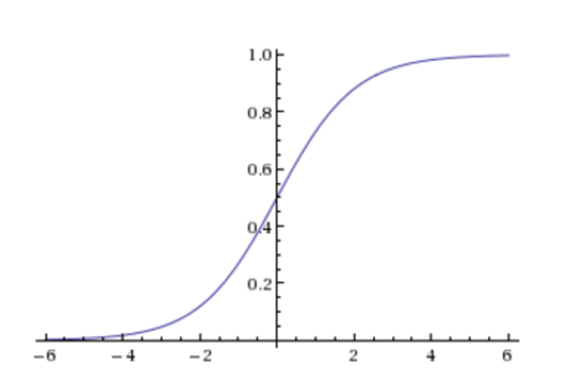

**对数几率函数**是一种“Sigmoid函数”

$$ y = \frac{1}{1 + e^{-z}} $$

将对数几率函数作为$ g(·) $代入广义线性模型，有：

$$ y = \frac{1}{1 + e^{-(w^T x + b)}} $$

$$ 以上为逻辑回归的基础形式 $$

### 2. 逻辑回归模型

#### 基本形式：

$$ ln \frac{y}{1-y} = w^T x + b $$


#### 目标：

预测值逼近真实值


#### 最大化“对数似然”

$$ l(w,b) = \sum_{i=1}^{m} \ln p(y_i | x_i; w,b) $$

即令每个样本属于其真实标记的概率越大越好。

基于**极大似然最大化**来进行模型求解的方法称为<span class="mark">**“极大似然法”**</span>

#### 损失函数

最小化损失函数相当于最大化“对数似然”

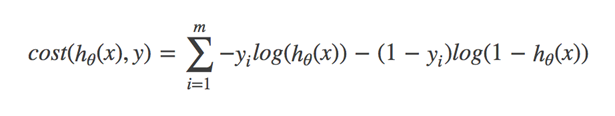


#### 求解：常用梯度下降


#### <span class="mark">哪个类别样本少，判断概率值就是属于这个类别的概率，该类别被当作正例</span>

### 3. API调用

#### `sklearn.linear_model.LogisticRegression`

sklearn.linear_model.LogisticRegression(penalty=‘l2’, C = 1.0)

### 4. 案例：良／恶性乳腺癌肿瘤预测

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [35]:
# 构造列标签名字
column = ['Sample code number','Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

# 读取数据
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=column)

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna()

In [37]:
# 训练集与测试集划分
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]],data[column[10]],test_size=0.25)

In [38]:
# 标准化:目标值不需要进行标准化
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [42]:
# 模型训练
lg = LogisticRegression(penalty='l2', C = 1.0) # 有超参数，可以使用网格搜索找到更合适的参数
lg.fit(x_train, y_train)

# 回归系数
print(lg.coef_)
print(" ")

# 准确率
y_predict = lg.predict(x_test)
print("准确率：%.5f" % lg.score(x_test, y_predict))
print(" ")

# 召回率等
print(classification_report(y_test, y_predict,labels=[2, 4], target_names=["良性", "恶性"]))

[[1.32234452 0.7098613  0.91572607 0.62853944 0.19819448 1.26276872
  0.74429123 0.4541433  0.56282963]]
 
准确率：1.00000
 
              precision    recall  f1-score   support

          良性       0.98      0.98      0.98       122
          恶性       0.96      0.96      0.96        49

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## 多分类问题

多分类的基本思路是**拆解法**，即将若干个多分类任务拆解为若干个二分类任务求解器。

拆分策略：

- **一对一(OvO)**

    - 将N个类别两两配对，从而产生N(N-1)/2个二分类任务。
    
- **一对其余(0vR)**

    - 将一个类的样例作为正例，所有其他类的样例作为反例。
    
- **多对多(MvM)**

    - 将若干类作为正例，若干个其他类作为反例。（MvM的正、反类构造必须有特殊的设计，不能随意选取。**“纠错输出码EOOC”**常用MvM技术。）

<img src="./data/ovo_ovr.jpg" width = "500" height = "500" />

## 样本不平衡问题

**样本不平衡就是指分类任务中不同类别的训练样例数目差别很大的情况。**


一般分类器的决策规则：
$\frac{y}{1-y} > 1$ 则 预测为正例

$m^+$表示正例数目，$m^-$表示反例数目，观测几率为$\frac{m^+}{m^-}$

只要分类器的预测几率高于观测几率，就应该被判定为正例：
$ \frac{y}{1-y} > \frac{m^+}{m^-}$


解决方法：

- 欠采样：去除一些反例使得正、反例数目接近 **EasyEnsemble算法**

- 过采样：增加一些正例使得正、反例数目接近 **SMOTE算法**

- 阈值移动：要求训练集是真实样本的无偏采样（这个假设一般不成立）

    新的决策规则：

    $$ \frac{y'}{1-y'} = \frac{y}{1-y} * \frac{m^-}{m^+} > 1，预测为正例$$



